# Unsupervised Learning 
## Task : Customer segmentation Clustering

## 1. Import necessary libraries and modules

In [6]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import datasets
from sklearn.cluster import KMeans, AgglomerativeClustering # For Hierarchical clustering
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import SilhouetteVisualizer # for sillouette analysis
from scipy.cluster.hierarchy import linkage, dendrogram # to visualize the dendogram

from sklearn.decomposition import PCA

You may need install `yellowbrick` package, you can do it by uncomment the following cell :

## 2. Load the data

In [7]:
df = pd.read_csv("Mall_Customers.csv")
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


## 3. Exploratory Data Analysis

## Exploring the data

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [7]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


### Handling Missing value

In [9]:
df.isna().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

### Handling categorical data

In [10]:
df["Gender"].value_counts()

Female    112
Male       88
Name: Gender, dtype: int64

In [11]:
df = pd.get_dummies(df, columns=['Gender'], drop_first = True, dtype = int)
df.head()

# with another way
#df["Gender"] = df["Gender"].map({"Male":0,"Female":1})
#df.head()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100),Gender_Male
0,1,19,15,39,1
1,2,21,15,81,1
2,3,20,16,6,0
3,4,23,16,77,0
4,5,31,17,40,0


## k-Means Clustering

In [12]:
df_= df.drop(['CustomerID'], axis = 1)
df_.head()

,Age,Annual Income (k$),Spending Score (1-100),Gender_Male
0,19,15,39,1
1,21,15,81,1
2,20,16,6,0
3,23,16,77,0
4,31,17,40,0


- For 5 Cluster

In [13]:
n_clusters = 5

# defining the kmeans function with initialization as k-means++
kmeans_5 = KMeans(n_clusters = n_clusters)

# fitting the k means algorithm on scaled data
kmeans_5.fit(df)

KMeans(n_clusters=5)

In [14]:
# Make clusters
kmeans_clusters_5 = kmeans_5.predict(df)
kmeans_clusters_5

array([2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4,
       2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4,
       2, 4, 2, 2, 2, 2, 2, 4, 4, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 1, 3, 1, 3, 1, 3, 1, 3,
       1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3,
       1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3,
       1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3,
       1, 3])

#### Clusers Distribution

In [16]:
pd.DataFrame(np.unique(kmeans_clusters_5, return_counts = True)[1], columns = ['N_observations'])

,N_observations
0,68
1,38
2,30
3,39
4,25


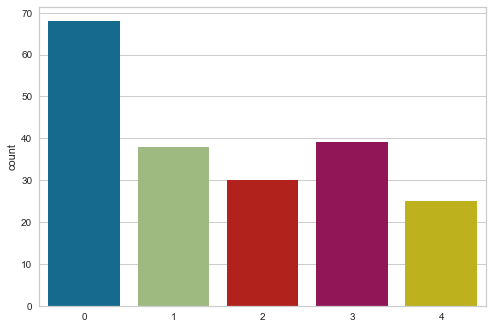

In [15]:
sns.countplot(x = kmeans_clusters_5)
plt.show()

### 4. Find the optimal number of clusters using the Elbow Method

### The Elbow Method

C:\Users\Utilisateur\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


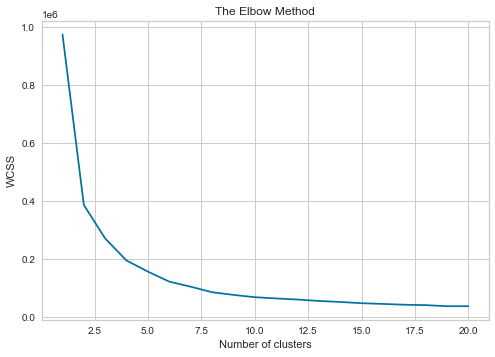

In [74]:
inertia = []  # inertia or Within-Cluster-Sum-of-Squares, lower values are better
for i in range(1, 21):  # Test with number of clusters from 1 to 10
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(df)
    inertia.append(kmeans.inertia_)  # inertia_ is the WCSS for the current model

plt.plot(range(1, 21), inertia)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

#### Silouette methode

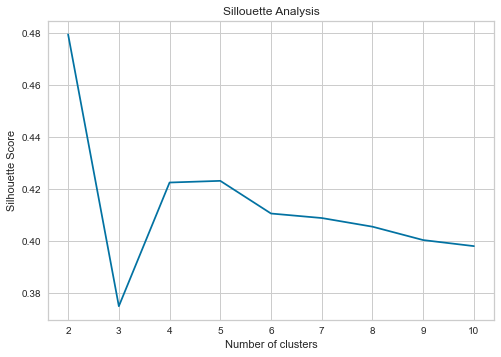

In [22]:
sil = []
kmax = 10

# dissimilarity would not be defined for a single cluster, thus, minimum number of clusters should be 2
for k in range(2, kmax+1):
  kmeans = KMeans(n_clusters = k, random_state = 0).fit(df)
  labels = kmeans.labels_
  sil.append(silhouette_score(df, labels, metric = 'euclidean'))

plt.plot(range(2, 11), sil)
plt.title('Sillouette Analysis')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.show()

- Sillouette plot of a model with 4 cluster

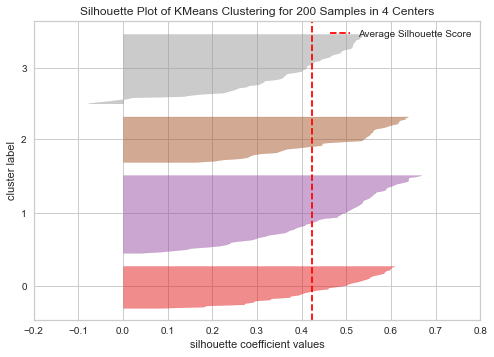

# of clusters: 4
Silhouette score 0.42245261332521894


In [38]:
silh = SilhouetteVisualizer(KMeans(4, random_state = 0))
silh.fit(df)
silh.poof()
print("# of clusters:", silh.n_clusters_)
print("Silhouette score", silh.silhouette_score_)

- Sillouette plot of a model with 5 cluster

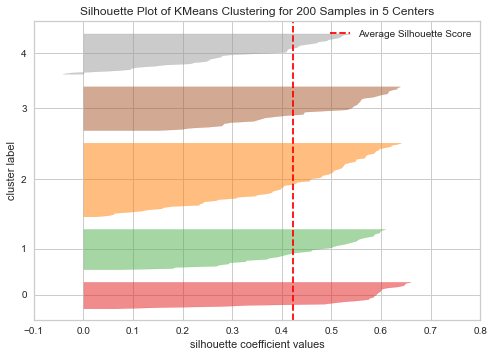

# of clusters: 5
Silhouette score 0.42309497779166094


In [39]:
silh = SilhouetteVisualizer(KMeans(5, random_state = 0))
silh.fit(df)
silh.poof()
print("# of clusters:", silh.n_clusters_)
print("Silhouette score", silh.silhouette_score_)

## 3. Selecte the optimal K and apply our clustering

We'll select 5 clusters

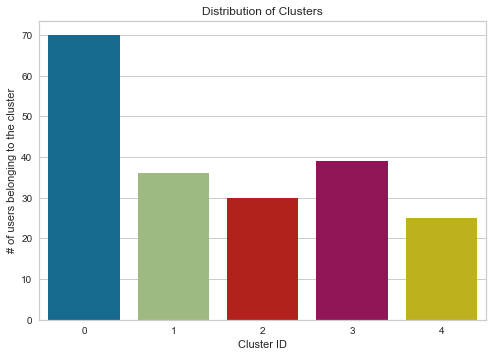

In [19]:
n_clusters = 5

# defining the kmeans function with initialization as k-means++
kmeans = KMeans(n_clusters = n_clusters)

# fitting the k means algorithm and Make clusters
kmeans_clusters = kmeans.fit_predict(df)

sns.countplot(x = kmeans_clusters)
plt.title('Distribution of Clusters')
plt.xlabel('Cluster ID')
plt.ylabel('# of users belonging to the cluster')
plt.show()

## 4. Visualize the clusters

In [20]:
clusters_ = pd.DataFrame(kmeans_clusters).rename(columns = {0: "clusters"}) # convert to df
# concat the predicted clusters to original data set
df_clusters = pd.concat([df, clusters_], axis = 1) # concat with original data set
df_clusters.head()
# cluster_id is the last column 

,CustomerID,Age,Annual Income (k$),Spending Score (1-100),Gender_Male,clusters
0,1,19,15,39,1,2
1,2,21,15,81,1,4
2,3,20,16,6,0,2
3,4,23,16,77,0,4
4,5,31,17,40,0,2


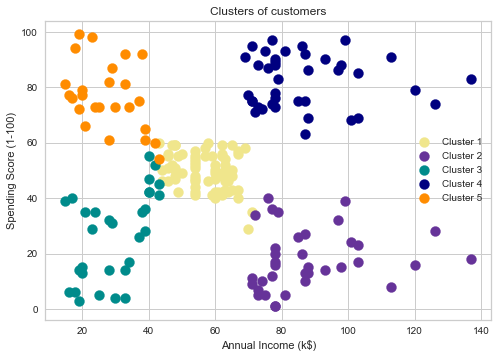

In [21]:
plt.scatter(df_clusters[df_clusters['clusters'] == 0][['Annual Income (k$)']], df_clusters[df_clusters['clusters'] == 0][['Spending Score (1-100)']], s = 100, c = 'khaki', label = 'Cluster 1')
plt.scatter(df_clusters[df_clusters['clusters'] == 1][['Annual Income (k$)']], df_clusters[df_clusters['clusters'] == 1][['Spending Score (1-100)']], s = 100, c = 'rebeccapurple', label = 'Cluster 2')
plt.scatter(df_clusters[df_clusters['clusters'] == 2][['Annual Income (k$)']], df_clusters[df_clusters['clusters'] == 2][['Spending Score (1-100)']], s = 100, c = 'darkcyan', label = 'Cluster 3')
plt.scatter(df_clusters[df_clusters['clusters'] == 3][['Annual Income (k$)']], df_clusters[df_clusters['clusters'] == 3][['Spending Score (1-100)']], s = 100, c = 'navy', label = 'Cluster 4')
plt.scatter(df_clusters[df_clusters['clusters'] == 4][['Annual Income (k$)']], df_clusters[df_clusters['clusters'] == 4][['Spending Score (1-100)']], s = 100, c = 'darkorange', label = 'Cluster 5')


plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

## Hierarcical Clustering 

In [30]:
agglo = AgglomerativeClustering(n_clusters=5)
agglo_clusters = agglo.fit_predict(df)
print('Sillouette score:', silhouette_score(df, agglo_clusters, metric = 'euclidean'))

Sillouette score: 0.39515682370438915


In [32]:
type(agglo_clusters)

numpy.ndarray

In [34]:
pd.DataFrame(agglo_clusters).rename(columns = {0: "clusters"})

,clusters
0,0
1,4
2,0
3,4
4,0
...,...
195,1
196,3
197,1
198,3


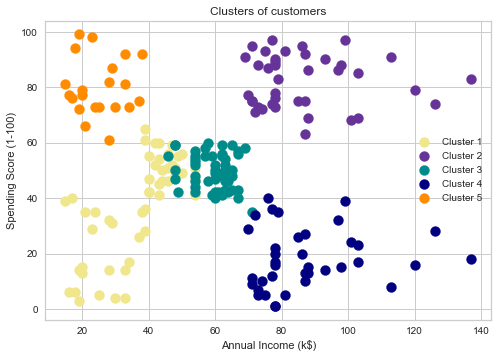

In [37]:
agglo = AgglomerativeClustering(n_clusters=5)
agglo_clusters = agglo.fit_predict(df)

clusters_ = pd.DataFrame(agglo_clusters).rename(columns = {0: "clusters"}) # convert to df
# concat the predicted clusters to original data set
df_clusters = pd.concat([df, clusters_], axis = 1) # concat with original data set
df_clusters.head()
# cluster_id is the last column 

plt.scatter(df_clusters[df_clusters['clusters'] == 0][['Annual Income (k$)']], df_clusters[df_clusters['clusters'] == 0][['Spending Score (1-100)']], s = 100, c = 'khaki', label = 'Cluster 1')
plt.scatter(df_clusters[df_clusters['clusters'] == 1][['Annual Income (k$)']], df_clusters[df_clusters['clusters'] == 1][['Spending Score (1-100)']], s = 100, c = 'rebeccapurple', label = 'Cluster 2')
plt.scatter(df_clusters[df_clusters['clusters'] == 2][['Annual Income (k$)']], df_clusters[df_clusters['clusters'] == 2][['Spending Score (1-100)']], s = 100, c = 'darkcyan', label = 'Cluster 3')
plt.scatter(df_clusters[df_clusters['clusters'] == 3][['Annual Income (k$)']], df_clusters[df_clusters['clusters'] == 3][['Spending Score (1-100)']], s = 100, c = 'navy', label = 'Cluster 4')
plt.scatter(df_clusters[df_clusters['clusters'] == 4][['Annual Income (k$)']], df_clusters[df_clusters['clusters'] == 4][['Spending Score (1-100)']], s = 100, c = 'darkorange', label = 'Cluster 5')


plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

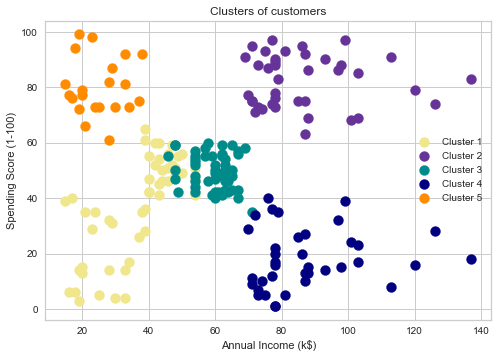

In [36]:
plt.scatter(df_clusters[df_clusters['clusters'] == 0][['Annual Income (k$)']], df_clusters[df_clusters['clusters'] == 0][['Spending Score (1-100)']], s = 100, c = 'khaki', label = 'Cluster 1')
plt.scatter(df_clusters[df_clusters['clusters'] == 1][['Annual Income (k$)']], df_clusters[df_clusters['clusters'] == 1][['Spending Score (1-100)']], s = 100, c = 'rebeccapurple', label = 'Cluster 2')
plt.scatter(df_clusters[df_clusters['clusters'] == 2][['Annual Income (k$)']], df_clusters[df_clusters['clusters'] == 2][['Spending Score (1-100)']], s = 100, c = 'darkcyan', label = 'Cluster 3')
plt.scatter(df_clusters[df_clusters['clusters'] == 3][['Annual Income (k$)']], df_clusters[df_clusters['clusters'] == 3][['Spending Score (1-100)']], s = 100, c = 'navy', label = 'Cluster 4')
plt.scatter(df_clusters[df_clusters['clusters'] == 4][['Annual Income (k$)']], df_clusters[df_clusters['clusters'] == 4][['Spending Score (1-100)']], s = 100, c = 'darkorange', label = 'Cluster 5')


plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()